## Simple Linear Regression

#### Importing notebooks

In [2]:
%%capture
%run '01_Getting_Data.ipynb'

#### Importing packages

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

### 1. Define Training and Testing Sets

In [20]:
x = data.search_volume.values
y = data.bitcoin_price.values

length = len(x)

x = x.reshape(length, 1)
y = y.reshape(length, 1)

In [21]:
test_size = round(length*0.1)
train_size = length - test_size

In [23]:
x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[-test_size:]
y_test = y[-test_size:]

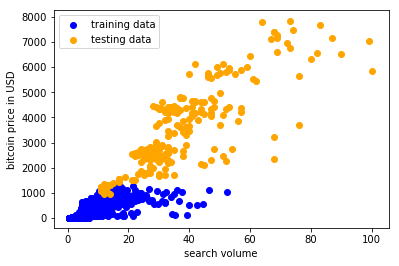

In [26]:
fig, ax = pyplot.subplots()
ax.scatter(x_train, y_train, color='blue', label = 'training data')
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
ax.legend(loc=2)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

### 2. Execute Linear Regression

In [8]:
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)

coef = regression.coef_[0][0]
intercept = regression.intercept_[0]

print("coefficient: \t" + repr(round(coef,1)))
print("intercept: \t" + repr(round(intercept,1)))

coefficient: 	39.700000000000003
intercept: 	80.700000000000003


Mathematical equation for red fitting line:
\begin{align}
{f(x)} & = 39.7*x-80.7 \\
\end{align}

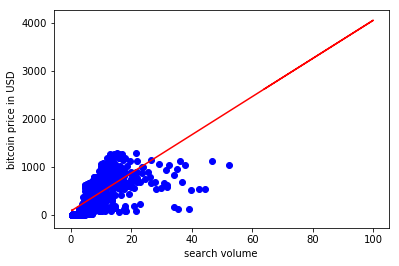

In [9]:
fig, ax = pyplot.subplots()
ax.plot(x, coef * x + intercept, color='red')
ax.scatter(x_train, y_train, color='blue')
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

In [10]:
y_predict = regression.predict(x_test)

In [11]:
rmse = sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

2189.852178962802


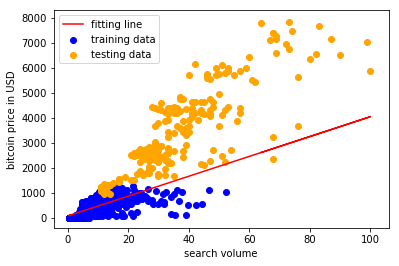

In [27]:
fig, ax = pyplot.subplots()
ax.scatter(x_train, y_train, color='blue', label = 'training data')
ax.plot(x, coef * x + intercept, color='red', label = 'fitting line')
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
ax.legend(loc=2)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

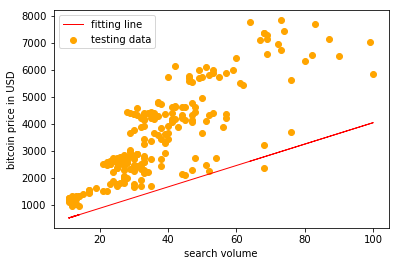

In [28]:
fig, ax = pyplot.subplots()
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
#ax.scatter(x_test, y_predict,  color='red', label = 'predicted data')
ax.plot(x_test, y_predict, color='red', linewidth=1, label = 'fitting line')
ax.legend(loc=0)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)